# WUM - PD2

Krzysztof Wolny

In [1]:
# import packages
import pandas as pd
import numpy as np
import sklearn 
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)

In [19]:
# read data
allegro = pd.read_csv('https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1')

In [20]:
allegro.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [21]:
allegro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

In [5]:
allegro.keys()

Index(['lp', 'date', 'item_id', 'categories', 'pay_option_on_delivery',
       'pay_option_transfer', 'seller', 'price', 'it_is_allegro_standard',
       'it_quantity', 'it_is_brand_zone', 'it_seller_rating', 'it_location',
       'main_category'],
      dtype='object')

## Kodowanie zmiennych kategorycznych

###  Target encoding dla zmiennej it_location

In [6]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()
allegro['location_encoded'] = encoder.fit_transform(allegro['it_location'], allegro['price'])
allegro.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,location_encoded
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery,85.423398
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki",85.423398
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród,61.990914
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy,35.433365
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki",117.191956


 **Czy i jakie są przewagi target encoding nad one-hot?**  
 Target encoding jest metodą prostą i szybką, która nie tworzy dodatkowych kolumn. 

### Encoding dla main_category

**1. One-hot encoder**

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(allegro.main_category)

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(label.reshape(-1,1))

dfonehot = pd.DataFrame(onehot_encoded)
allegro_one_hot = pd.concat([allegro, dfonehot], axis =1)
allegro_one_hot.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,17,18,19,20,21,22,23,24,25,26
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
allegro_one_hot.keys()

Index([                    'lp',                   'date',
                      'item_id',             'categories',
       'pay_option_on_delivery',    'pay_option_transfer',
                       'seller',                  'price',
       'it_is_allegro_standard',            'it_quantity',
             'it_is_brand_zone',       'it_seller_rating',
                  'it_location',          'main_category',
             'location_encoded',                        0,
                              1,                        2,
                              3,                        4,
                              5,                        6,
                              7,                        8,
                              9,                       10,
                             11,                       12,
                             13,                       14,
                             15,                       16,
                             17,                       1

**Opis one-hot encoder**  
Stworzyliśmy 27 nowych kolumn. Każda kolumna odpowiada jednej wartości, która znajdowała się w kolumnie 'main_category'. W nowych kolumnach mamy wartości równe tylko 0 i 1. 1 oznacza, że dana wartość znajduje się się w danej kolumnie, a 0 przeciwnie. 

**2. Ordinal encoder**

In [9]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

allegro_ordinal = allegro.copy()
allegro_ordinal['main_ordinal_encoder'] = oe.fit_transform(allegro['main_category'].values.reshape(-1,1))
allegro_ordinal.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,location_encoded,main_ordinal_encoder
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery,85.423398,12.0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki",85.423398,18.0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród,61.990914,6.0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy,35.433365,14.0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki",117.191956,18.0


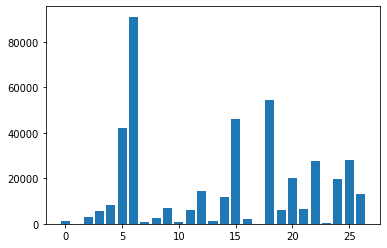

In [10]:
# narysujmy barplot
x = allegro_ordinal.groupby('main_ordinal_encoder').size()
plt.bar(x.keys(), x)
plt.show()

**Opis ordinal encoder**  
Dla każdego wyniku w kolumnie 'main_category' przypisaliśmy jedną liczbę. Wyszło, że jest 27 unikalnych wyników w 'main_category' i każdy wynik dostał oddzielną liczbę od 0 do 26. 

**3. Binary encoder**

In [11]:
import category_encoders as ce

encoder = ce.BinaryEncoder(return_df=True)

allegro_binary=encoder.fit_transform(allegro['main_category']) 
allegro_binary = pd.concat([allegro, allegro_binary], axis =1)
allegro_binary.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,it_seller_rating,it_location,main_category,location_encoded,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,50177,Warszawa,Komputery,85.423398,0,0,0,0,0,1
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,12428,Warszawa,"Odzież, Obuwie, Dodatki",85.423398,0,0,0,0,1,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,7389,Leszno,Dom i Ogród,61.990914,0,0,0,0,1,1
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,15006,Wola Krzysztoporska,Książki i Komiksy,35.433365,0,0,0,1,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,...,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki",117.191956,0,0,0,0,1,0


**Opis binary encoder**  
Binary encoder działa bardzo podobnie jak one-hot encoder. Różnica polega na tym, że każda unikalna wartość jest przedstawiana jako liczba binarna i następnie rozdzielana na kolejne liczby i w ten sposób zapisywana do kolumn. Dzięki temu mamy mniej tworzonych kolumn. 

## Uzupełnianie braków

In [12]:
# ograniczenie danych do price, it_seller_rating i it_quantity
import math
n = 0.1 # jak dużo wierszy wziąć 

numerical_allegro  = allegro[['price', 'it_seller_rating', 'it_quantity']]
numerical_allegro = numerical_allegro.head(math.floor(len(numerical_allegro)*n))

Będę korzystać z Nearest neighbors imputation

In [13]:
from sklearn.impute import KNNImputer
def fil_tester(df, column_name):
    df[[column_name]] = df[[column_name]].stack().sample(frac=0.9).unstack()
    imputer = KNNImputer(n_neighbors=2)
    df[[column_name]] = imputer.fit_transform(df[[column_name]])

### Test1: it_seller_rating

In [14]:
na_1 = numerical_allegro.copy()

In [15]:
# wykonaj test 10 razy
for i in range(10):
    fil_tester(na_1, 'it_seller_rating')
    print(f'RMSE{i}: {np.sqrt(mean_squared_error(numerical_allegro, na_1)):.3f}')
# odchylenie standardowe: 
print(f'Odchylenie standardowe: {np.std(na_1["it_seller_rating"])}')

RMSE0: 6612.574
RMSE1: 9235.188
RMSE2: 11025.000
RMSE3: 12282.867
RMSE4: 13417.677
RMSE5: 14291.736
RMSE6: 15065.488
RMSE7: 15703.059
RMSE8: 16344.299
RMSE9: 16818.883
Odchylenie standardowe: 21517.1590546303


### Test2: it_seller_rating i it_quantity

In [16]:
na_2 = numerical_allegro.copy()

In [17]:
# wykonaj test 10 razy
for i in range(10):
    fil_tester(na_2, 'it_seller_rating')
    fil_tester(na_2, 'it_quantity')
    print(f'RMSE{i}: {np.sqrt(mean_squared_error(numerical_allegro, na_2)):.3f}')
# odchylenie standardowe: 
print(f'Odchylenie standardowe: {np.std(na_2["it_seller_rating"])}')

RMSE0: 7531.388
RMSE1: 10416.065
RMSE2: 12648.498
RMSE3: 14422.623
RMSE4: 15724.299
RMSE5: 16829.617
RMSE6: 17746.890
RMSE7: 18583.430
RMSE8: 19413.905
RMSE9: 20073.053
Odchylenie standardowe: 21378.147202529937


### Wnioski

W momencie, gdy robimy test2 na 'it_seller_rating' i 'it_quantity' miara RMSE jest większa, niż gdy zmieniamy tylko 'it_seller_rating', ale odchylenie standardowe jest mniejsze. To oznacza, że wartości testu 2 różnią się bardziej od początkowych, ale są bardziej skupione wokół średniej. 

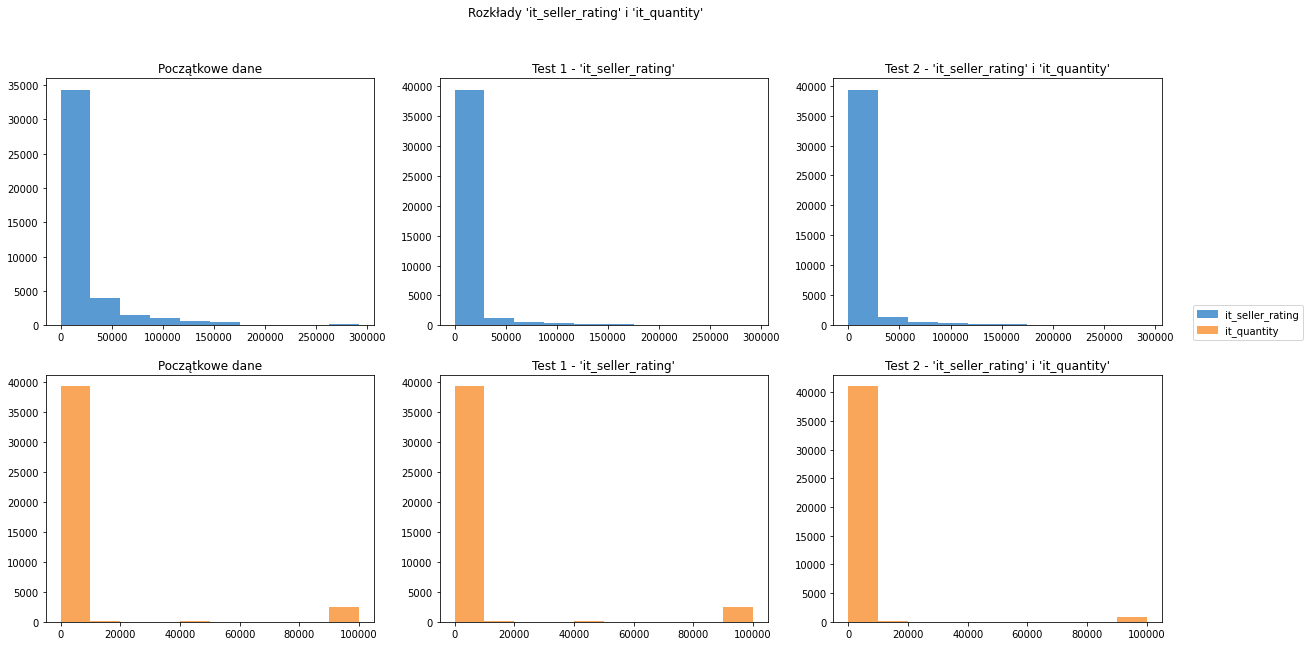

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 3,figsize=(20,10))
fig.suptitle('Rozkłady \'it_seller_rating\' i \'it_quantity\'')
ax1[0].hist(numerical_allegro['it_seller_rating'], color = "#599ad3")
ax1[0].set_title('Początkowe dane')
ax1[1].hist(na_1['it_seller_rating'], color = "#599ad3")
ax1[1].set_title('Test 1 - \'it_seller_rating\'')
ax1[2].hist(na_2['it_seller_rating'], color = "#599ad3")
ax1[2].set_title('Test 2 - \'it_seller_rating\' i \'it_quantity\'')


ax2[0].hist(numerical_allegro['it_quantity'], color = "#f9a65a")
ax2[0].set_title('Początkowe dane')
ax2[1].hist(na_1['it_quantity'], color = "#f9a65a")
ax2[1].set_title('Test 1 - \'it_seller_rating\'')
ax2[2].hist(na_2['it_quantity'], color = "#f9a65a")
ax2[2].set_title('Test 2 - \'it_seller_rating\' i \'it_quantity\'')

it_seller_rating_patch = mpatches.Patch(color='#599ad3', label='it_seller_rating')
it_quantity_patch = mpatches.Patch(color='#f9a65a', label='it_quantity')
fig.legend(handles=[it_seller_rating_patch, it_quantity_patch], loc='center right')

fig.show()